<a href="https://colab.research.google.com/github/vivek72v/Book_Recommendation_Sysytem/blob/main/Final_Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Book Recommendation System



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**   Vivek Kumar Singh
##### **Team Member 2 -**   Pawan Kumar Singh
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

#Data Preprocessing
* The needed modules are imported and the datasets are loaded
* We view the first five rows of  dataset and their shape
* Get the info of datsets like the non null count in each column and the data type of each column
* The datsets are checked for presence of duplicate rows
* The columns of datset are checked for missing or null values  which are found to be very minimal except the 'Age' column in 'users' datset
* The datasets  are visualised for presence of null values
* We take a quick summary overview through few important statistics using describe function
*  Unique values of each variable is checked 
#Data wrangling
* The Image Urls are removed from Dataset books
*  The non integer values in Year-of-Publication column is  made zero and integer values afre kept as it is and stored in a new column 'year'
* Country is extracted from 'Location' column
* We apply inner join on books and books and ratings dataframe using ISBN column 
* In books datset same books appear multiple times with different publishers 
so we create a dataset where book apperars only once and not multiple times
* We get the count of how many times a book has been rated for every book
* We get the average ratings for every book
* We create a dataset having the number of ratings and average ratings of every book. 
#Exploratory Data Analysis(EDA)
1. Distribution of ratings is visualised using countplot
2. Authors who have written maximum number of books in the datset is visualized using barplot
3. Publishers who have published maximum books is visualised using barplt
4. Distribution of users by country is checked through barplot.
5. Distribution of sell of books from year 1970 to 2050 visualised using countplot
6. Distribution plot of age of users is plotted.
7. Books with maximum sell is visualised using barplot
8. The authors whose  maximum books have been sold out is visualised using barplot
9. The books most published by multiple publishers is visualised
10. Number of books rated and number of books not rated is visualised
11.
12.
13.
14.
15.
#Hypothesis testing
1.
2.
3.

* For the purpose of recommendation we consider only books which have been rated atleast fifty times and the users who have rated atleast fifty books so we create a dataframe with users and books fullfilling these criterion.
* A pivot table is created with  row as book title and columns as User id and the values are the ratings given by the user to the book
* A function is created to recommend books on the basis of a book name passed to it as parameter 






# **GitHub Link -**

https://github.com/vivek72v/Book_Recommendation_Sysytem

# **Problem Statement**


During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.
In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries). Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
#Installing the surprise package needed for collaborative filtering
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp39-cp39-linux_x86_64.whl size=3195786 sha256=48db1c6ea55f99abcf6f8bf5552813aa15a680cf7a870dbf25ed5e21a28b7f06
  Stored in directory: /root/.cache/pip/wheels/c6/3a/46/9b17b3512bdf283c6cb84f59929cdd5199d4e754d596d22784
Successfully built scikit-surprise


In [2]:
# Import Libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from surprise import Dataset, Reader
from surprise import SVD, NMF, KNNWithMeans
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

### Dataset Loading

In [3]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
books = pd.read_csv('/content/drive/MyDrive/AlmaBetter/books_dataset/Books.csv')
users = pd.read_csv('/content/drive/MyDrive/AlmaBetter/books_dataset/Users.csv')
ratings = pd.read_csv('/content/drive/MyDrive/AlmaBetter/books_dataset/Ratings.csv')

Mounted at /content/drive


### Dataset First View

In [4]:
# Dataset First Look
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
books.shape

(271360, 8)

In [8]:
users.shape

(278858, 3)

In [9]:
ratings.shape

(1149780, 3)

### Dataset Information

In [10]:
# Dataset Info
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [12]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


#### Duplicate Values

In [13]:
# Dataset Duplicate Value Count

In [14]:
len(books[books.duplicated()])

0

In [15]:
len(users[users.duplicated()])

0

In [16]:
len(ratings[ratings.duplicated()])

0

#### Missing Values/Null Values

In [17]:
# Missing Values/Null Values Count
print(books.isnull().sum())

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


In [18]:
print(users.isnull().sum())

User-ID          0
Location         0
Age         110762
dtype: int64


In [19]:
print(ratings.isnull().sum())

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


Text(0.5, 1.0, ' Visualising Missing Values')

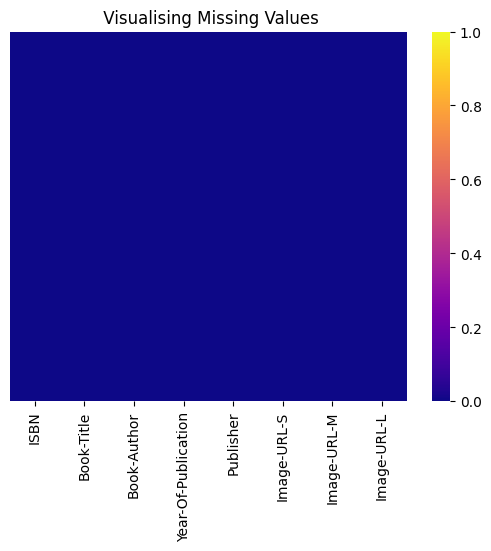

In [20]:
# Visualizing the missing values
sns.heatmap(books.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

Text(0.5, 1.0, ' Visualising Missing Values')

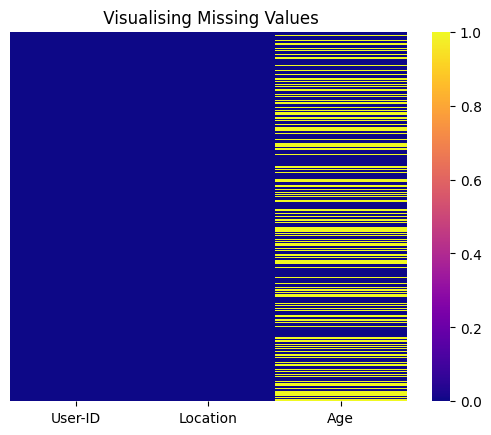

In [21]:
sns.heatmap(users.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

In [22]:
users.Age.fillna(0, inplace = True)

Text(0.5, 1.0, ' Visualising Missing Values')

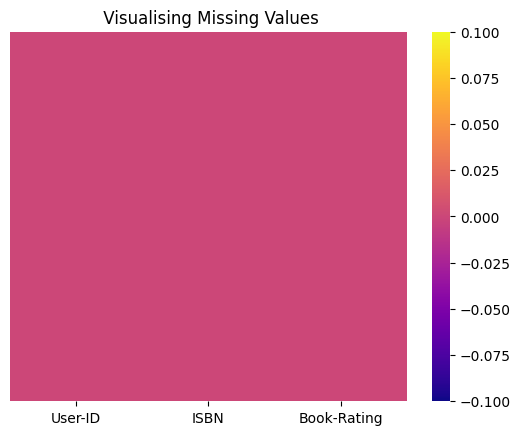

In [23]:
sns.heatmap(ratings.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

### What did you know about your dataset?

* There are three datsets of name users , books and ratings
* The age columns in users dataset has many Null values.
* 

## ***2. Understanding Your Variables***

In [24]:
# Dataset Columns
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [25]:
users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [26]:
ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [27]:
# Dataset Describe
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [28]:
users.describe()

,User-ID,Age
count,278858.00000,278858.000000
mean,139429.50000,20.948214
std,80499.51502,20.362679
min,1.00000,0.000000
25%,69715.25000,0.000000
50%,139429.50000,22.000000
75%,209143.75000,35.000000
max,278858.00000,244.000000


In [29]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


### Variables Description 

Users variables 
* User-ID  : Unique Identification number of each user
* Location : Location details of each user
* Age      : Age of the user

Books Variables
* ISBN  : International Standard Book Number
* Book - Title : Name of the Book
* Book - Author : Book's Author Name
* Year-Of-Publication : Year Of the publication of the Book
* Publisher	: Name of the publisher of the Book
* Image-URL-S : Small size Image Url of the Book
* Image-URL-M : Medium size Image Url of the Book
* Image-URL-L : Large size Image Url of the Book

Ratings
* User-ID  : Unique Identification number of each user
* ISBN  : International Standard Book Number
* Book-Rating : rating given by the user to the book

### Check Unique Values for each variable.

In [30]:
# Check Unique Values for each variable.
books.nunique()

ISBN                   271360
Book-Title             242135
Book-Author            102023
Year-Of-Publication       202
Publisher               16807
Image-URL-S            271044
Image-URL-M            271044
Image-URL-L            271041
dtype: int64

In [31]:
users.nunique()

User-ID     278858
Location     57339
Age            165
dtype: int64

In [32]:
ratings.nunique()

User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

#### Preparing Dataset for making Recommender System

In [33]:
#Keeping the ratings of the books which are in books dataset
ratings = ratings[ratings.ISBN.isin(books.ISBN)]
ratings_original = ratings.copy()

In [34]:
#Keeping only the valid rating that is those higher then zero
ratings = ratings[ratings['Book-Rating'] != 0]

In [35]:
#Getting users with who have rated atleast 3 books
user_ratings_threshold = 50
filter_users = ratings['User-ID'].value_counts()
filter_users_list = filter_users[filter_users >= user_ratings_threshold].index.to_list()
df_ratings_top = ratings[ratings['User-ID'].isin(filter_users_list)]

In [36]:
#Choosing the top ten percent most frequently rated books
book_ratings_threshold_perc = 0.1
book_ratings_threshold = len(df_ratings_top['ISBN'].unique()) * book_ratings_threshold_perc
filter_books_list = df_ratings_top['ISBN'].value_counts().head(int(book_ratings_threshold)).index.to_list()
df_ratings_top = df_ratings_top[df_ratings_top['ISBN'].isin(filter_books_list)]

In [37]:
#creating the dataset for collaborative filtering using surprise package
df=df_ratings_top.copy()
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['User-ID', 'ISBN', 'Book-Rating']], reader)

#### Dataframe Column Manipulation

In [38]:
#Removing the image-url as it is not needed.
books = books[['ISBN','Book-Title','Book-Author','Year-Of-Publication','Publisher']]

In [39]:
# Write your code to make your dataset analysis ready.
#Converting column year-of-publication of dataframe books  to integer datatype from object datatype
books['year'] = books["Year-Of-Publication"].map(lambda x : x if type(x) ==int else 0)

In [40]:
#Getting the country in a seperate column from location details given
users['Location'] = users['Location'].str.split(',')
users['country'] = users['Location'].apply(pd.Series)[2]

#### For EDA

In [41]:
# Applying inner join on users and ratings dataframe using the column 'User-ID'
user_ratings = pd.merge(users,ratings, on= 'User-ID' , how  ='inner')

In [42]:
#Applying inner join on books and ratings dataframe using ISBN column 
book_ratings = pd.merge(books,ratings , on = 'ISBN' , how = 'inner')

In [43]:
#Getting a Dataset by merging all the three datasets books, users and ratings.
Final_Dataset=pd.merge(pd.merge(users,ratings,on='User-ID'),books,on = 'ISBN')

In [44]:
#In books dataset same books appear multiple times with different publishers 
#Creating a dataset where book appears only once and not multiple times
books_unique = books[['Book-Title','Book-Author']].drop_duplicates()

#### Top Rated Books

In [45]:
#Getting  the count of how many times a book has been rated
average_numbers_of_ratings = book_ratings.groupby('Book-Title').count()['Book-Rating'].reset_index()
average_numbers_of_ratings.rename(columns = {'Book-Rating':'Number of Rating'} , inplace = True)
#Getting the average rating of each book
average_numbers_of_ratings['Average-Ratings'] = book_ratings.groupby('Book-Title').mean()['Book-Rating'].values

In [46]:
# The top rated books with atleast more than fifty ratings by users who have rated atleast fifty books
average_numbers_of_ratings= average_numbers_of_ratings[average_numbers_of_ratings['Number of Rating']>=50]
top_rated_books = average_numbers_of_ratings.sort_values(by = 'Average-Ratings' , ascending = False).head(10)

### What all manipulations have you done and insights you found?

* We keep only those ratings which are non zero and are given to books present in books dataset
* Create a dataframe named Final_dataset by combining our all three datasets books, users and ratings
* For the purpose of collaborative filtering we select only those users who have rated atleast fifty books and as the dataset is too large we select only top ten percent of the most frequently rated books for recommenadtion.
* The image urls are dropped as we will not be using it
* Country of the users are extracted from there given Location details
* Some Dataframes are created to perform certain EDA easily
* Dataframe of the top rated books with atleast more than fifty ratings by users who have rated atleast fifty books is created


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<Axes: xlabel='Book-Rating', ylabel='count'>

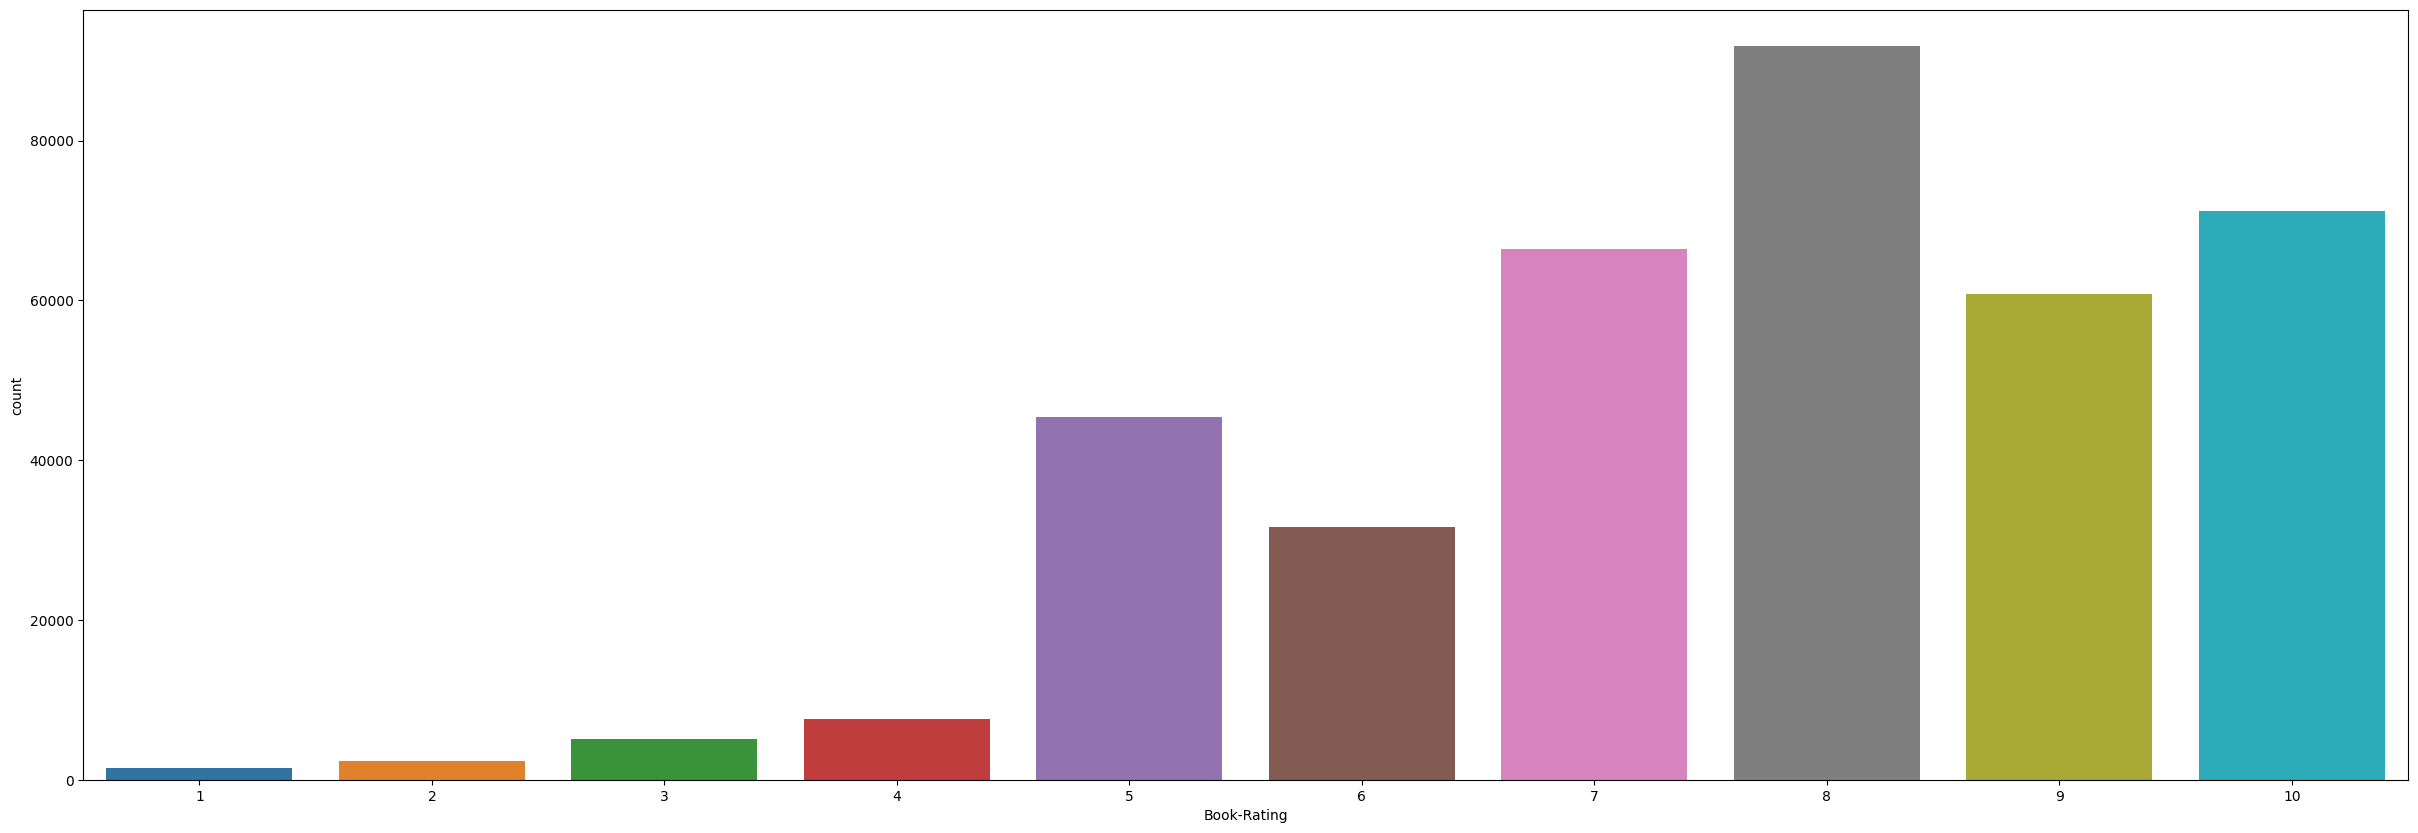

In [47]:
# Chart - 1 visualization code
plt.rcParams['figure.figsize'] = (30, 10) #Setting the size of figure
#Distribution of ratings of books
z = ratings[ratings['Book-Rating']>0]
sns.countplot(x = 'Book-Rating' , data = z)

##### 1. Why did you pick the specific chart?

To see the distribution of ratings

##### 2. What is/are the insight(s) found from the chart?

Most books have got high ratings of 8 followed by 10 and 7 ratings.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [48]:
# Chart - 2 visualization code
#Authors who have written maximum number of books
z =  books_unique['Book-Author'].value_counts().sort_values(ascending = False)[:15]
print(z)


William Shakespeare     496
Agatha Christie         476
Ann M. Martin           395
Carolyn Keene           371
Francine Pascal         349
Stephen King            332
Barbara Cartland        300
Not Applicable (Na )    286
Isaac Asimov            286
R. L. Stine             278
Nora Roberts            270
Charles Dickens         232
Franklin W. Dixon       204
Terry Pratchett         198
Janet Dailey            185
Name: Book-Author, dtype: int64


<Axes: >

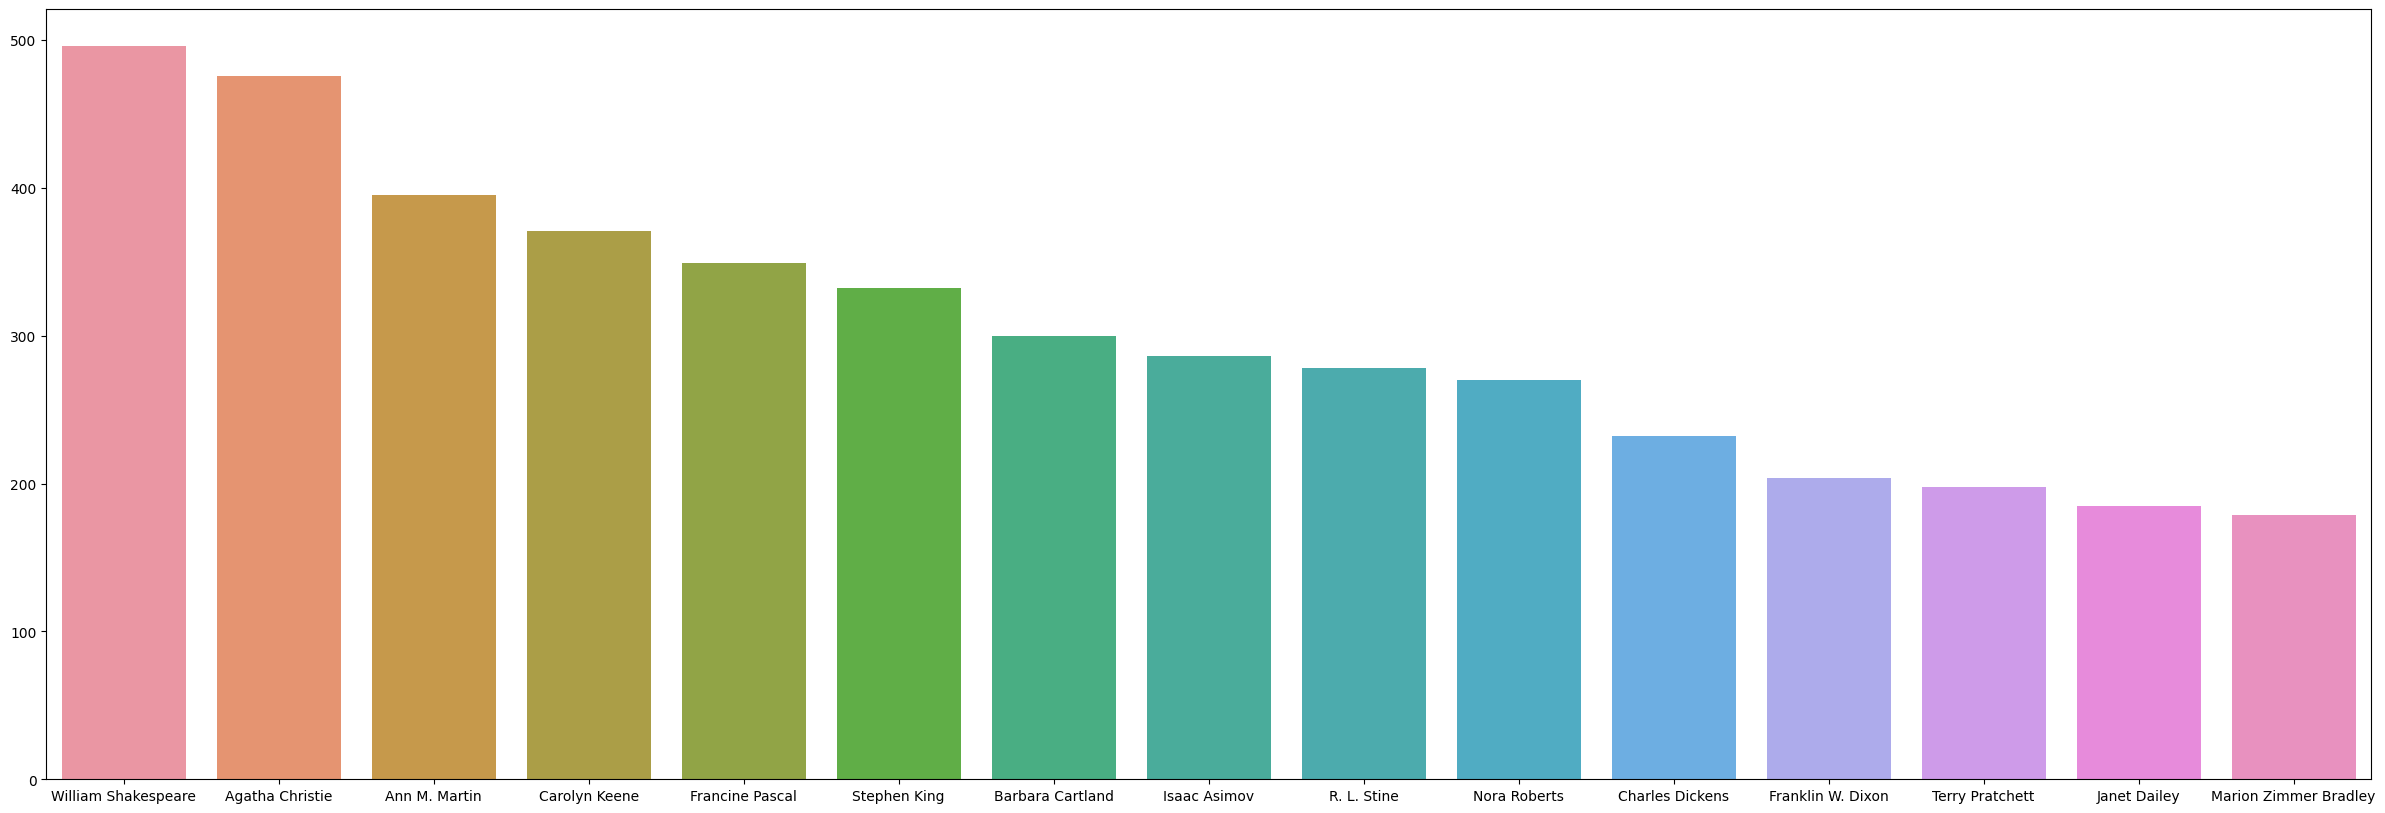

In [49]:
books_unique = books_unique[books_unique['Book-Author'] !='Not Applicable (Na )']
z =  books_unique['Book-Author'].value_counts().sort_values(ascending = False)[:15]
sns.barplot(x = z.index , y =  z.values )

##### 1. Why did you pick the specific chart?

To know the authors who have written maximum number of books in our dataset.

##### 2. What is/are the insight(s) found from the chart?

William Shakespeare has written maximum number of books

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

<Axes: >

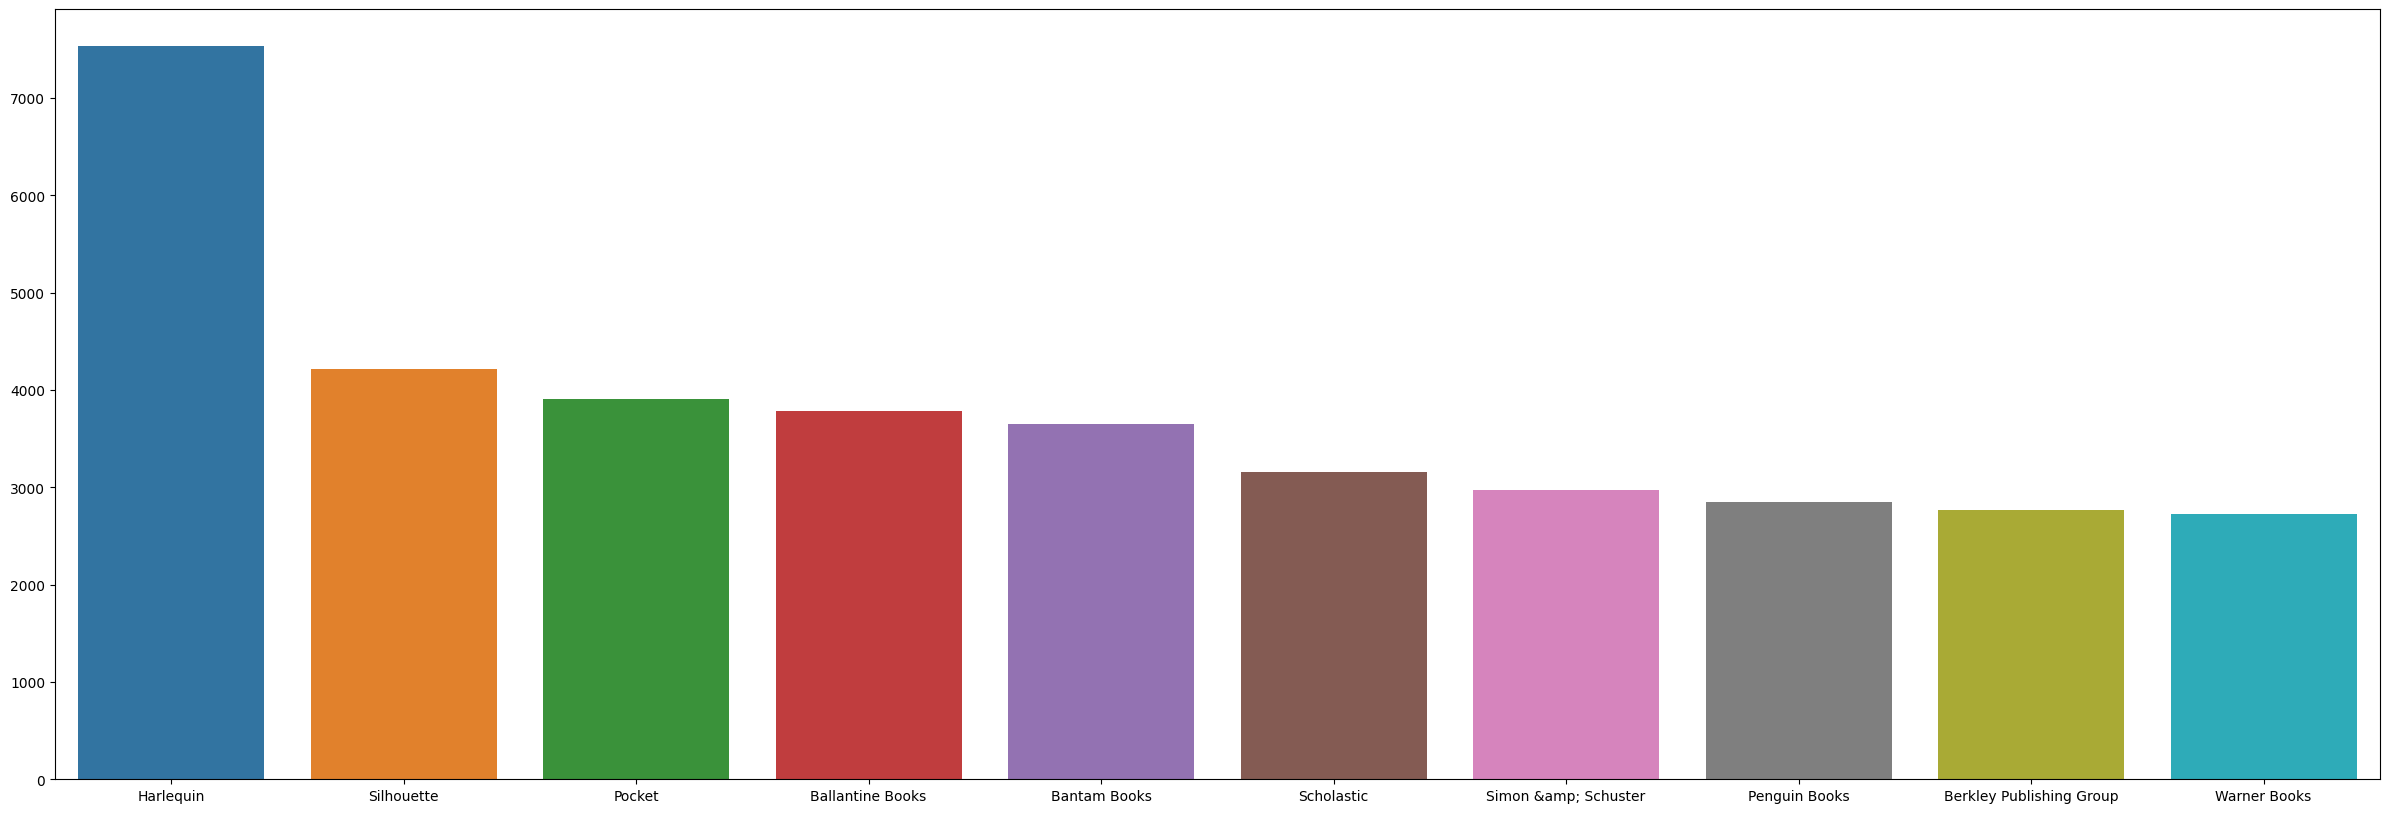

In [50]:
# Chart - 3 visualization code
z = books['Publisher'].value_counts().sort_values(ascending = False)[:10]
sns.barplot(x = z.index , y = z.values)

##### 1. Why did you pick the specific chart?

To know which authors have published most books

##### 2. What is/are the insight(s) found from the chart?

Most books has been published by the Ballantine Books

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

<Axes: >

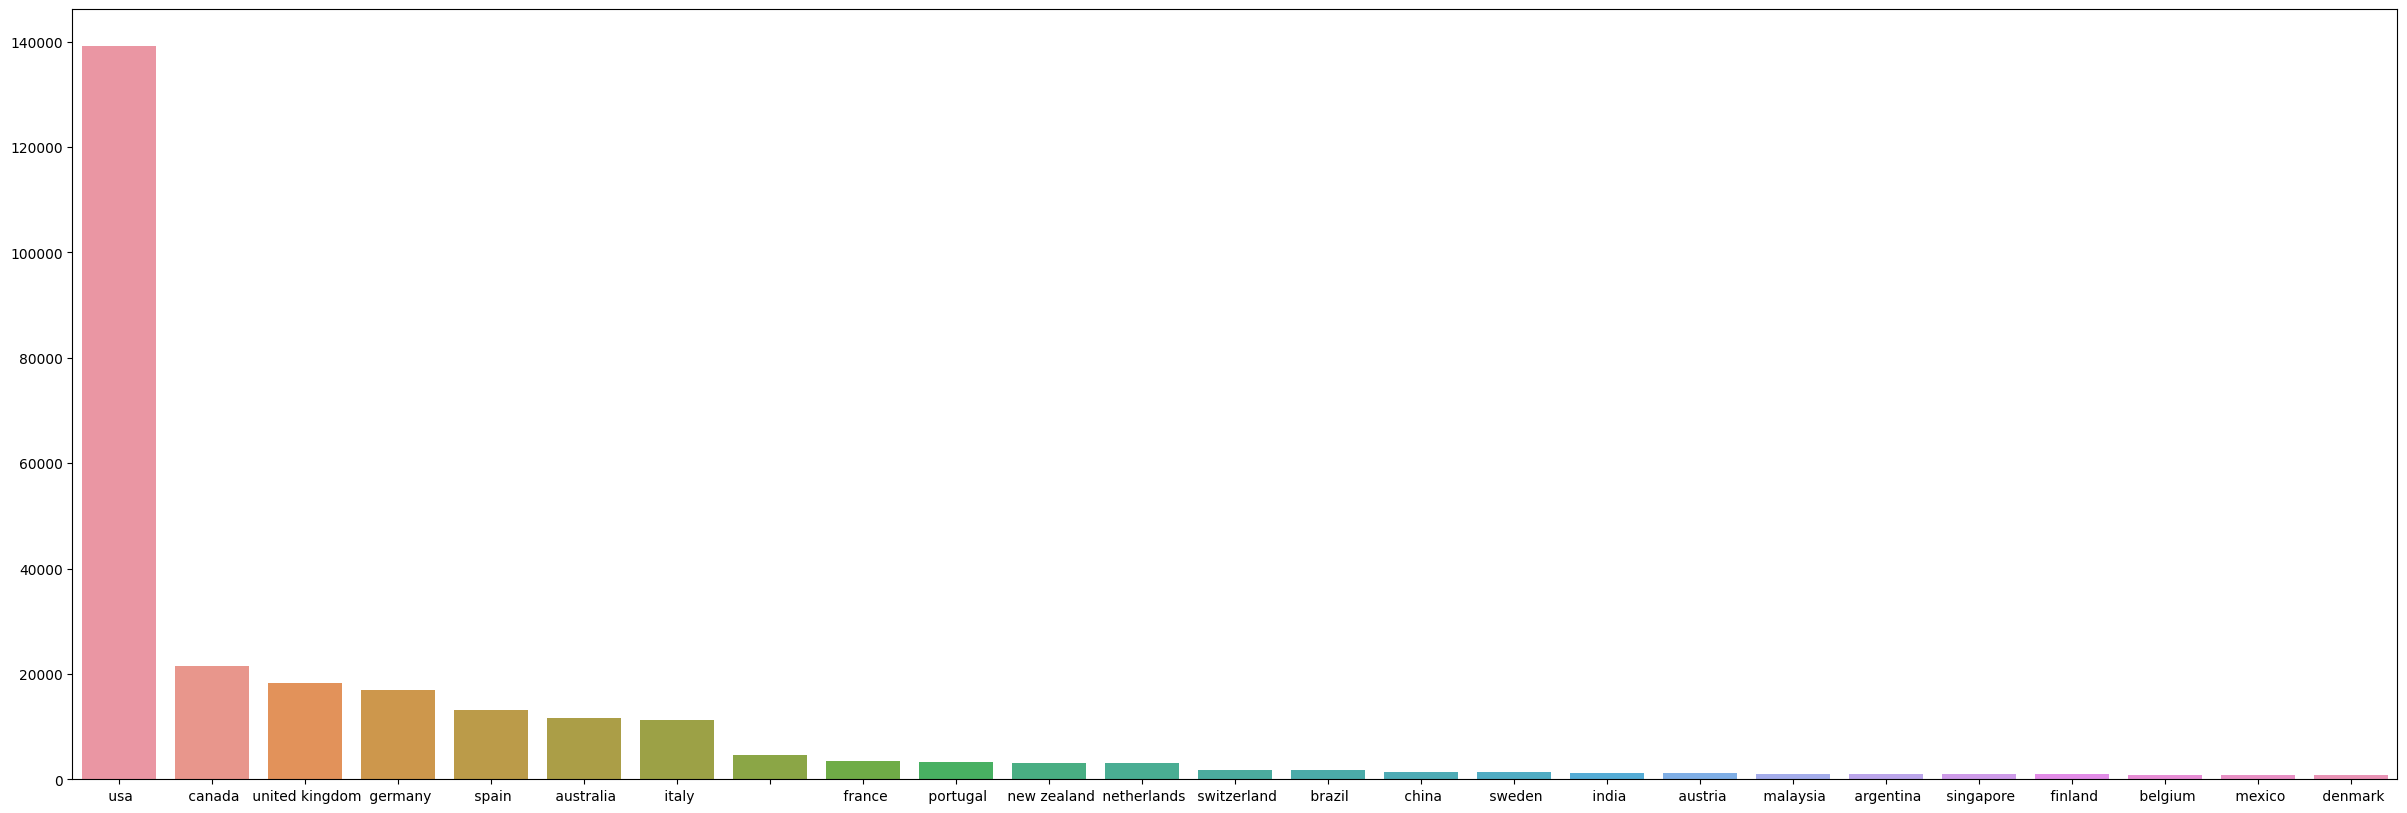

In [51]:
# Chart - 4 visualization code
z =  users['country'].value_counts().sort_values(ascending = False)[:25]
sns.barplot(x= z.index ,y =  z.values)

##### 1. Why did you pick the specific chart?

Which country has the most book readers

##### 2. What is/are the insight(s) found from the chart?

USA has the most book readers followed by Canada , United Kingdom , Germany and others.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

<Axes: xlabel='year', ylabel='count'>

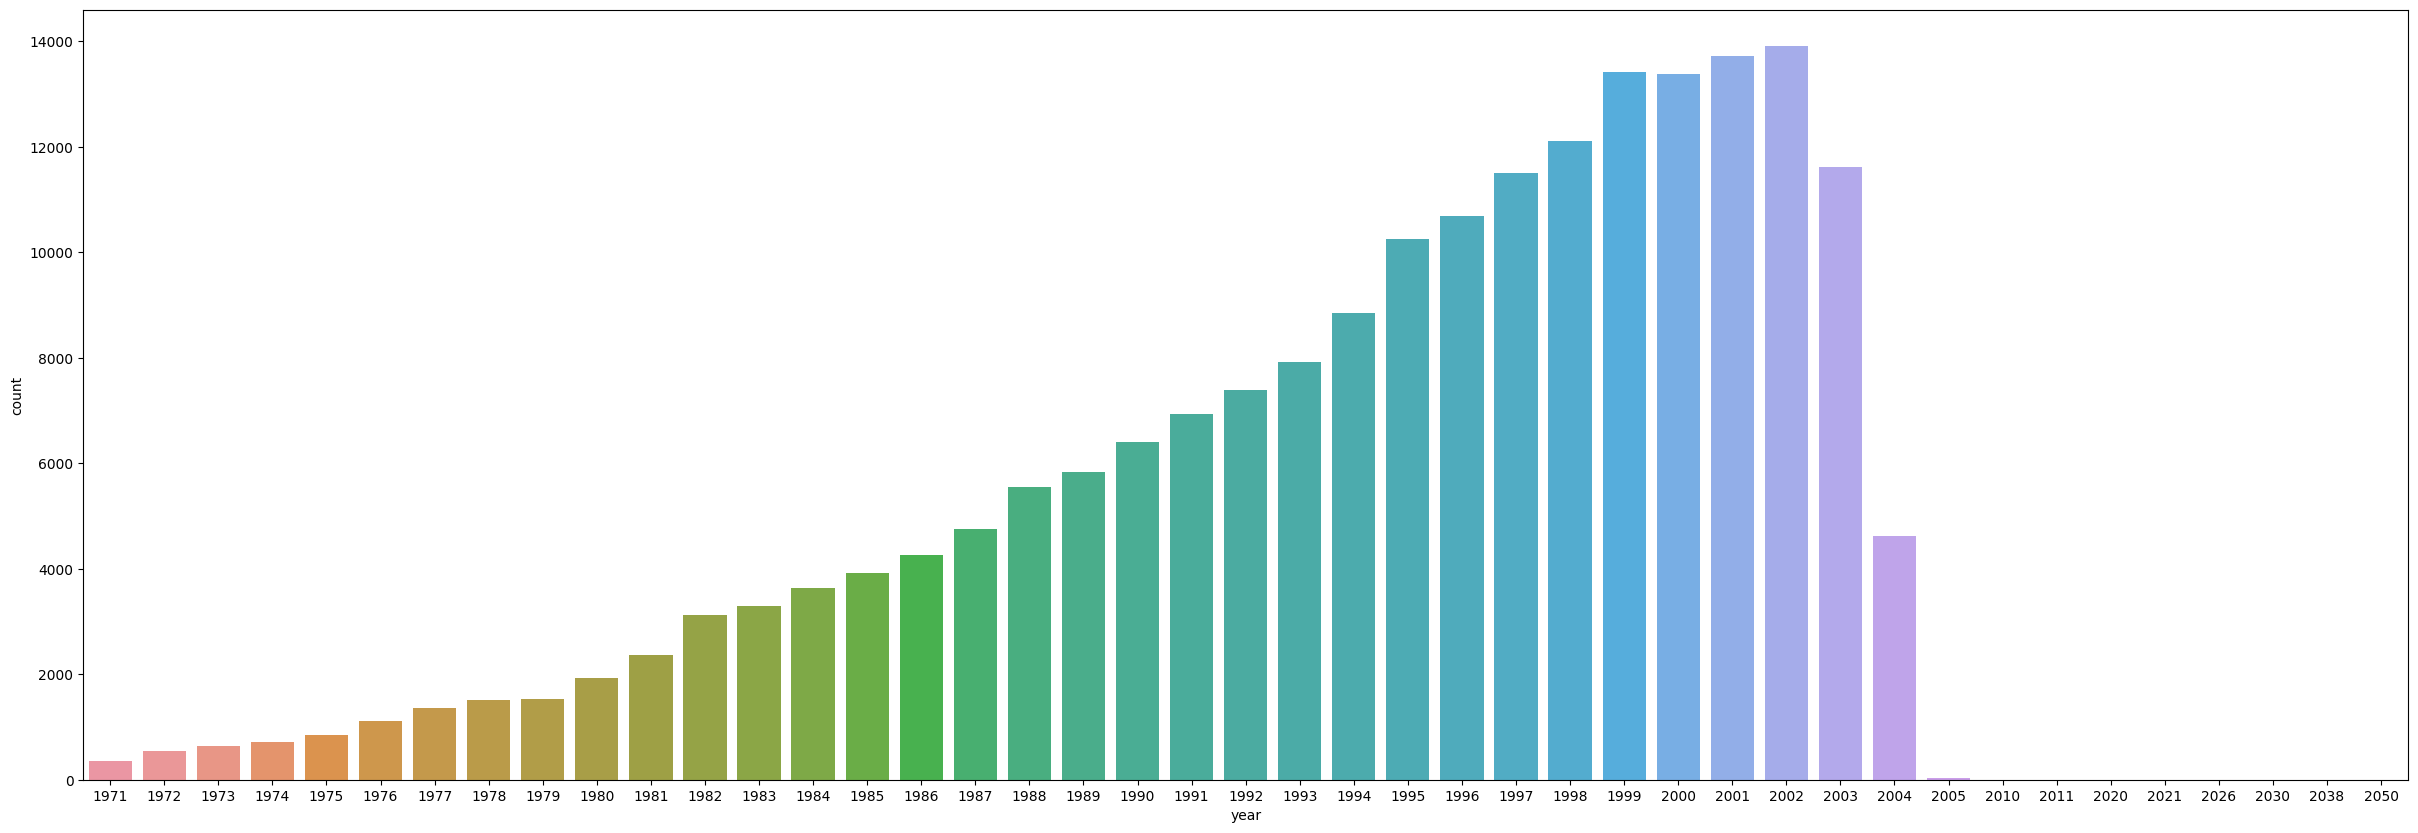

In [52]:
# Chart - 5 visualization code
#Distribution of books by year
books_year = books[books['year'] > 1970]['year']
sns.countplot(x = books_year)

##### 1. Why did you pick the specific chart?

To observe the sales of book from year 1970 onwards

##### 2. What is/are the insight(s) found from the chart?

The sales of the  books has been almost consistently increasing upto 2002

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

<Axes: ylabel='Density'>

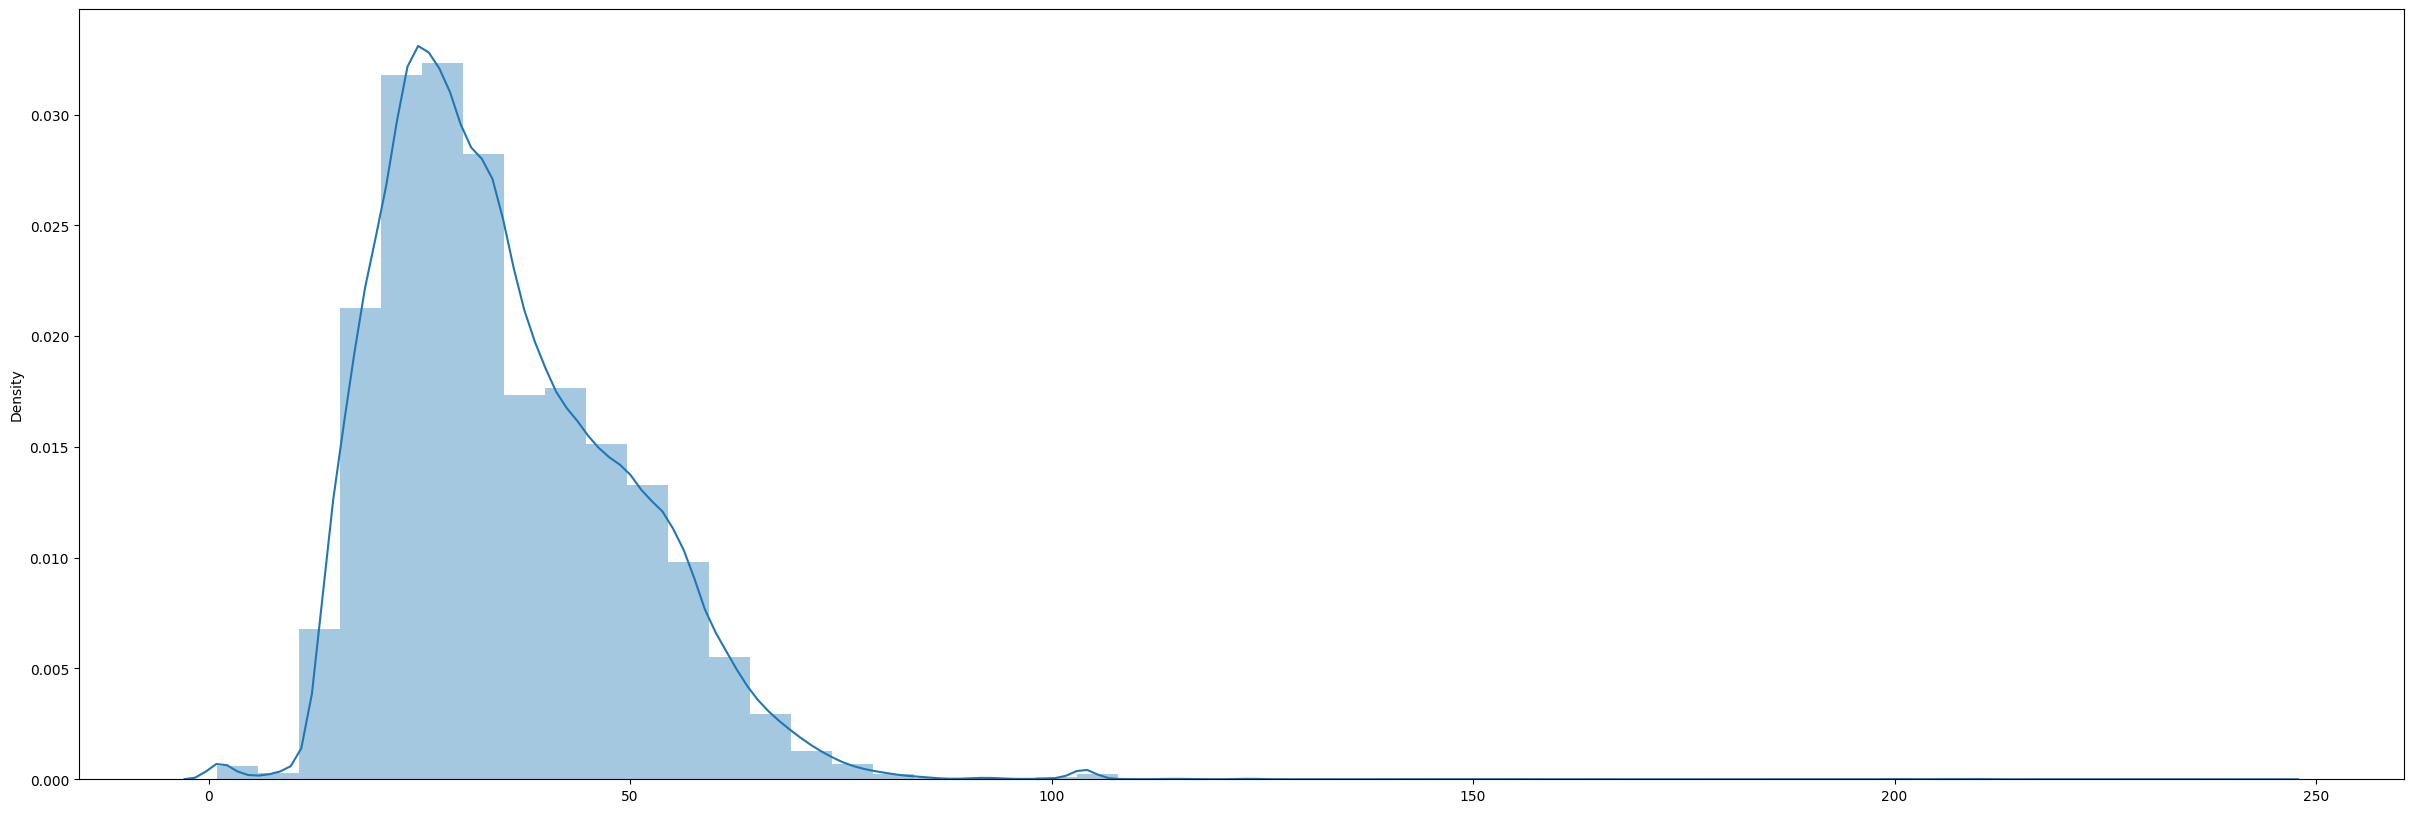

In [53]:
# Chart - 6 visualization code
sns.distplot(x = users[users['Age'] !=0]['Age'])

##### 1. Why did you pick the specific chart?

To look at the distribution of the age of the users

##### 2. What is/are the insight(s) found from the chart?

Most users are young and below thirty years of age

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It should be investigated as why people lose interest in books when they Age and what type of books do they prefer

#### Chart - 7

<Axes: xlabel='year', ylabel='Book-Title'>

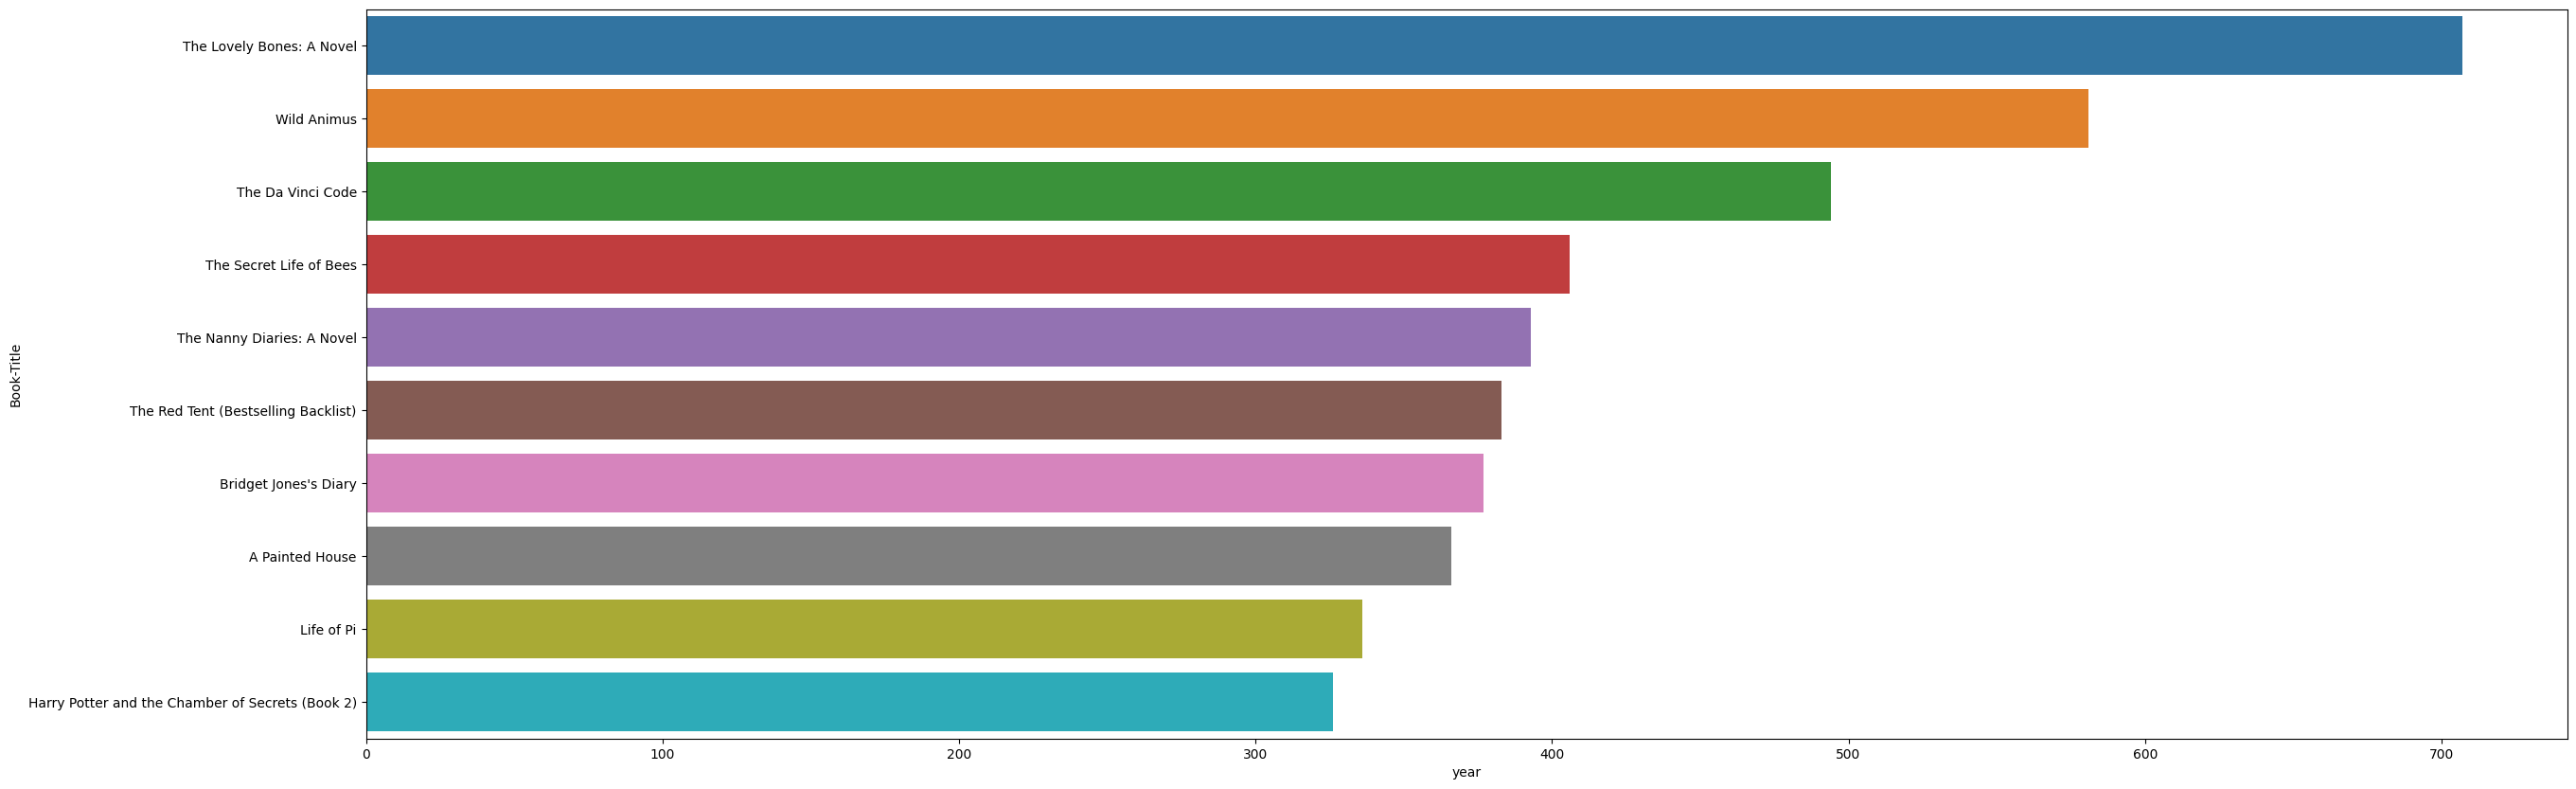

In [54]:
# Chart - 7 visualization code
#Books with maximum sell
z = book_ratings.groupby('Book-Title').count().sort_values(by = 'ISBN',ascending = False)[:10]
sns.barplot(x = z['year'] ,y =  z.index )

##### 1. Why did you pick the specific chart?

To find out the Best Selling Books

##### 2. What is/are the insight(s) found from the chart?

Wild Animus is the best selling book.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

<Axes: >

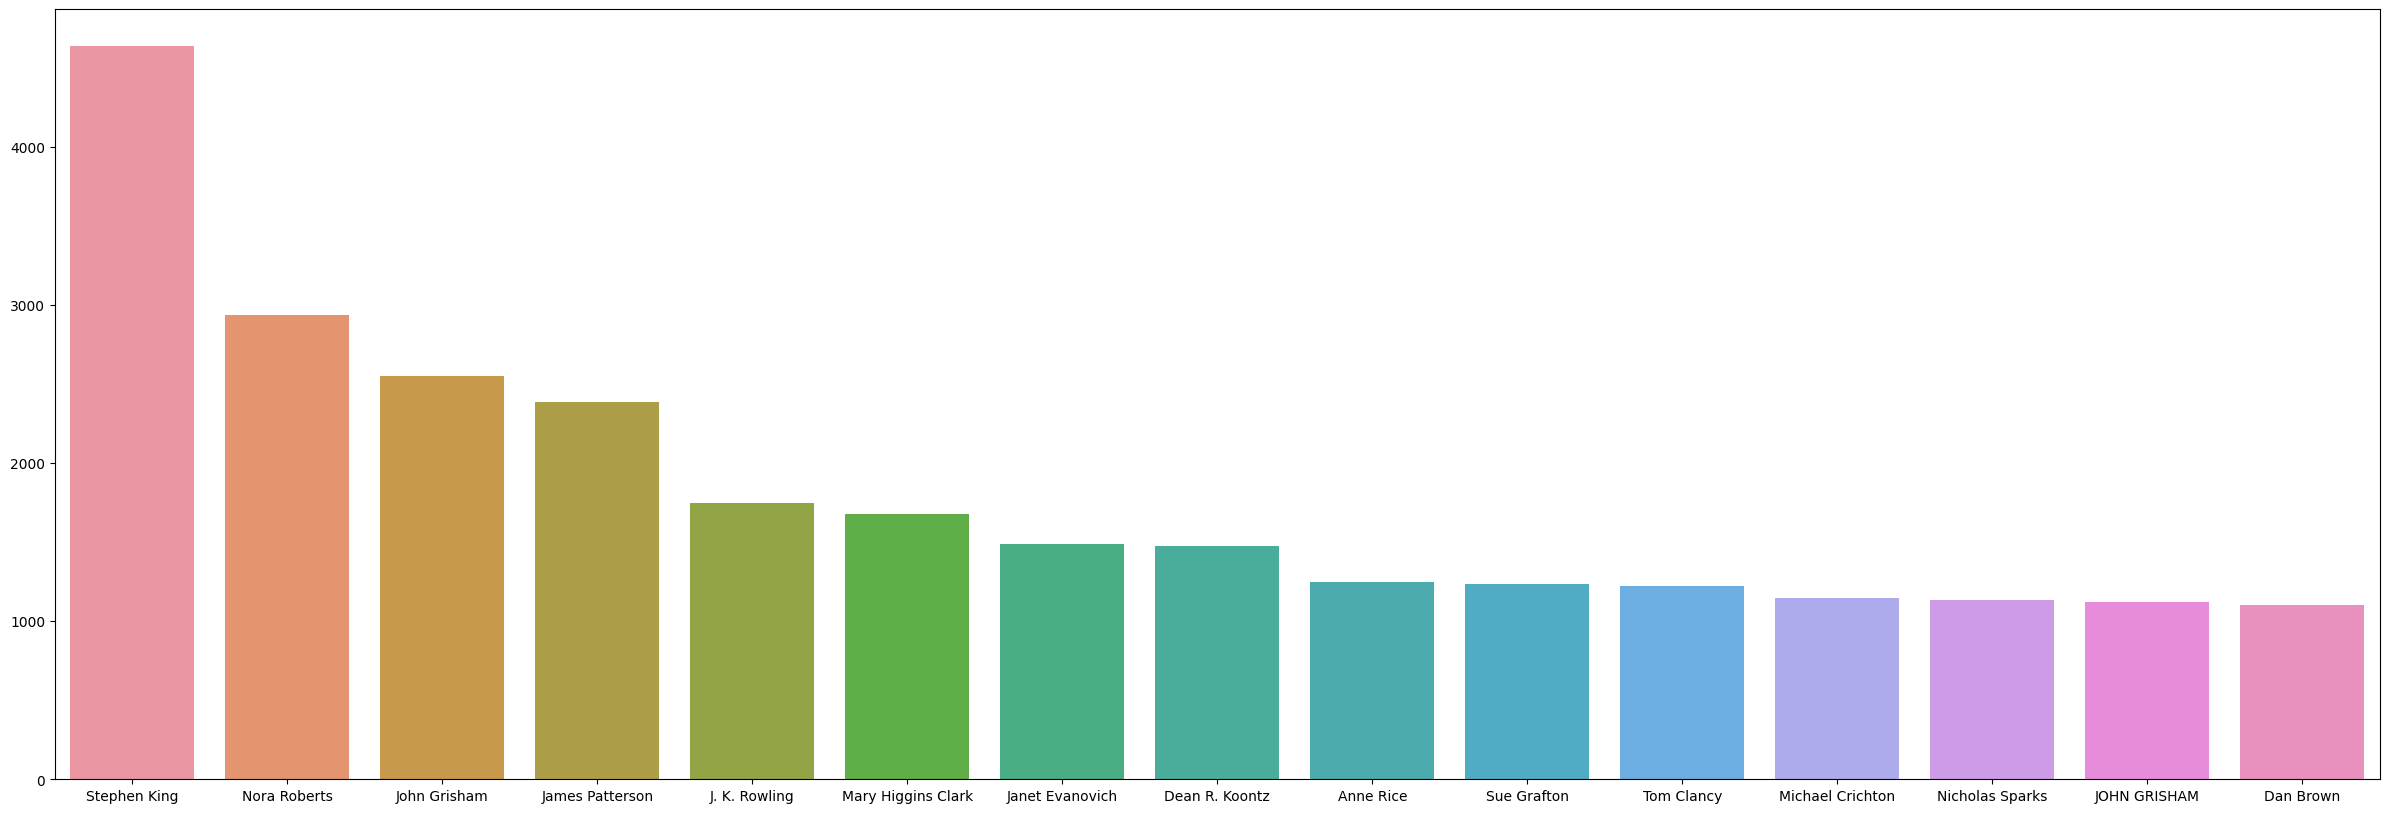

In [55]:
# Chart - 8 visualization code
#Best Selling Authors
z = book_ratings['Book-Author'].value_counts().sort_values(ascending = False)[:15]
sns.barplot(x= z.index , y = z.values)

##### 1. Why did you pick the specific chart?

To find out the Authors whose books has been sold most.

##### 2. What is/are the insight(s) found from the chart?

Books of Stepen King has been brought most.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

<Axes: xlabel='ISBN', ylabel='Book-Title'>

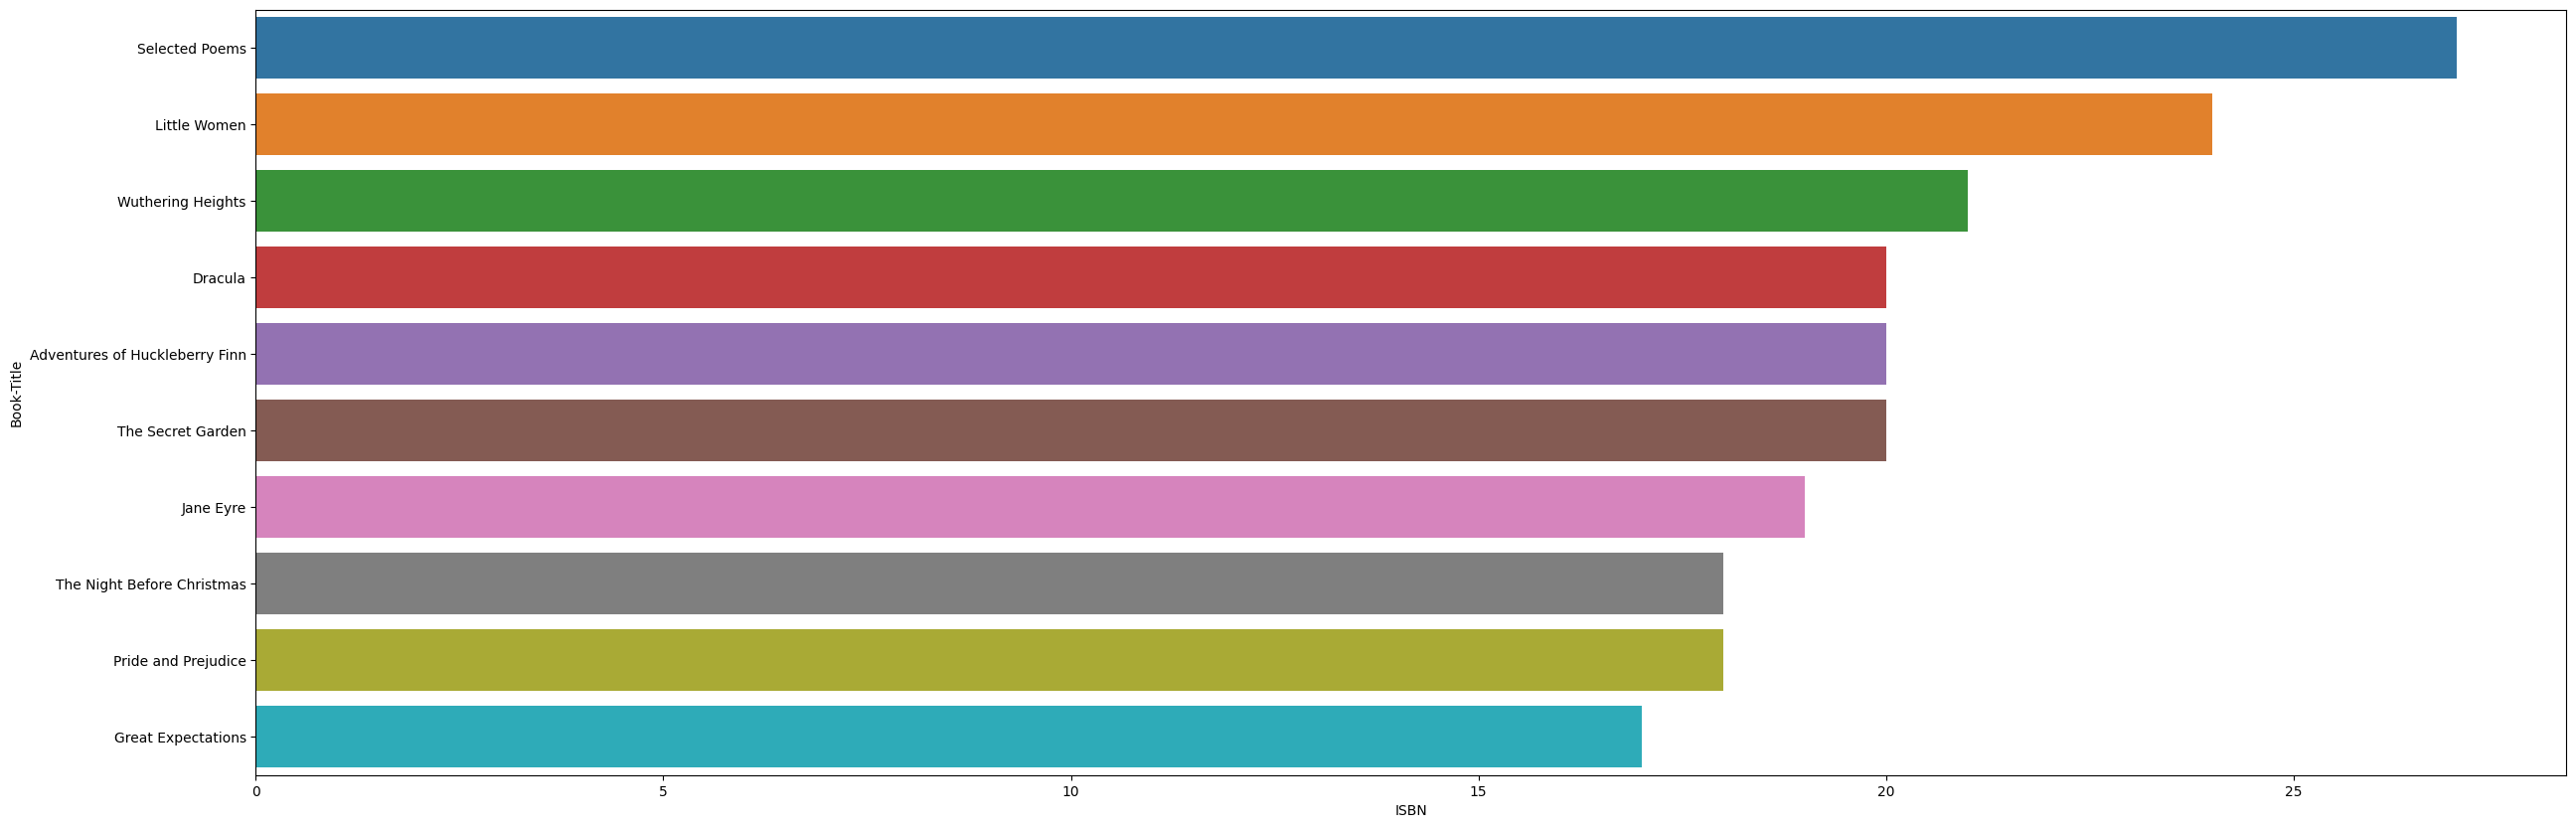

In [56]:
# Chart - 9 visualization code
#Books most published by different publishers
z = books.groupby('Book-Title').count().sort_values(by = 'ISBN',ascending = False)[:10]
sns.barplot(x =  z['ISBN'],y =   z.index)

##### 1. Why did you pick the specific chart?

To find out the books which has been published by different publishers

##### 2. What is/are the insight(s) found from the chart?

The book 'Selected Poems' has been published most by differentb publishers

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

<Axes: xlabel='Book-Rating', ylabel='count'>

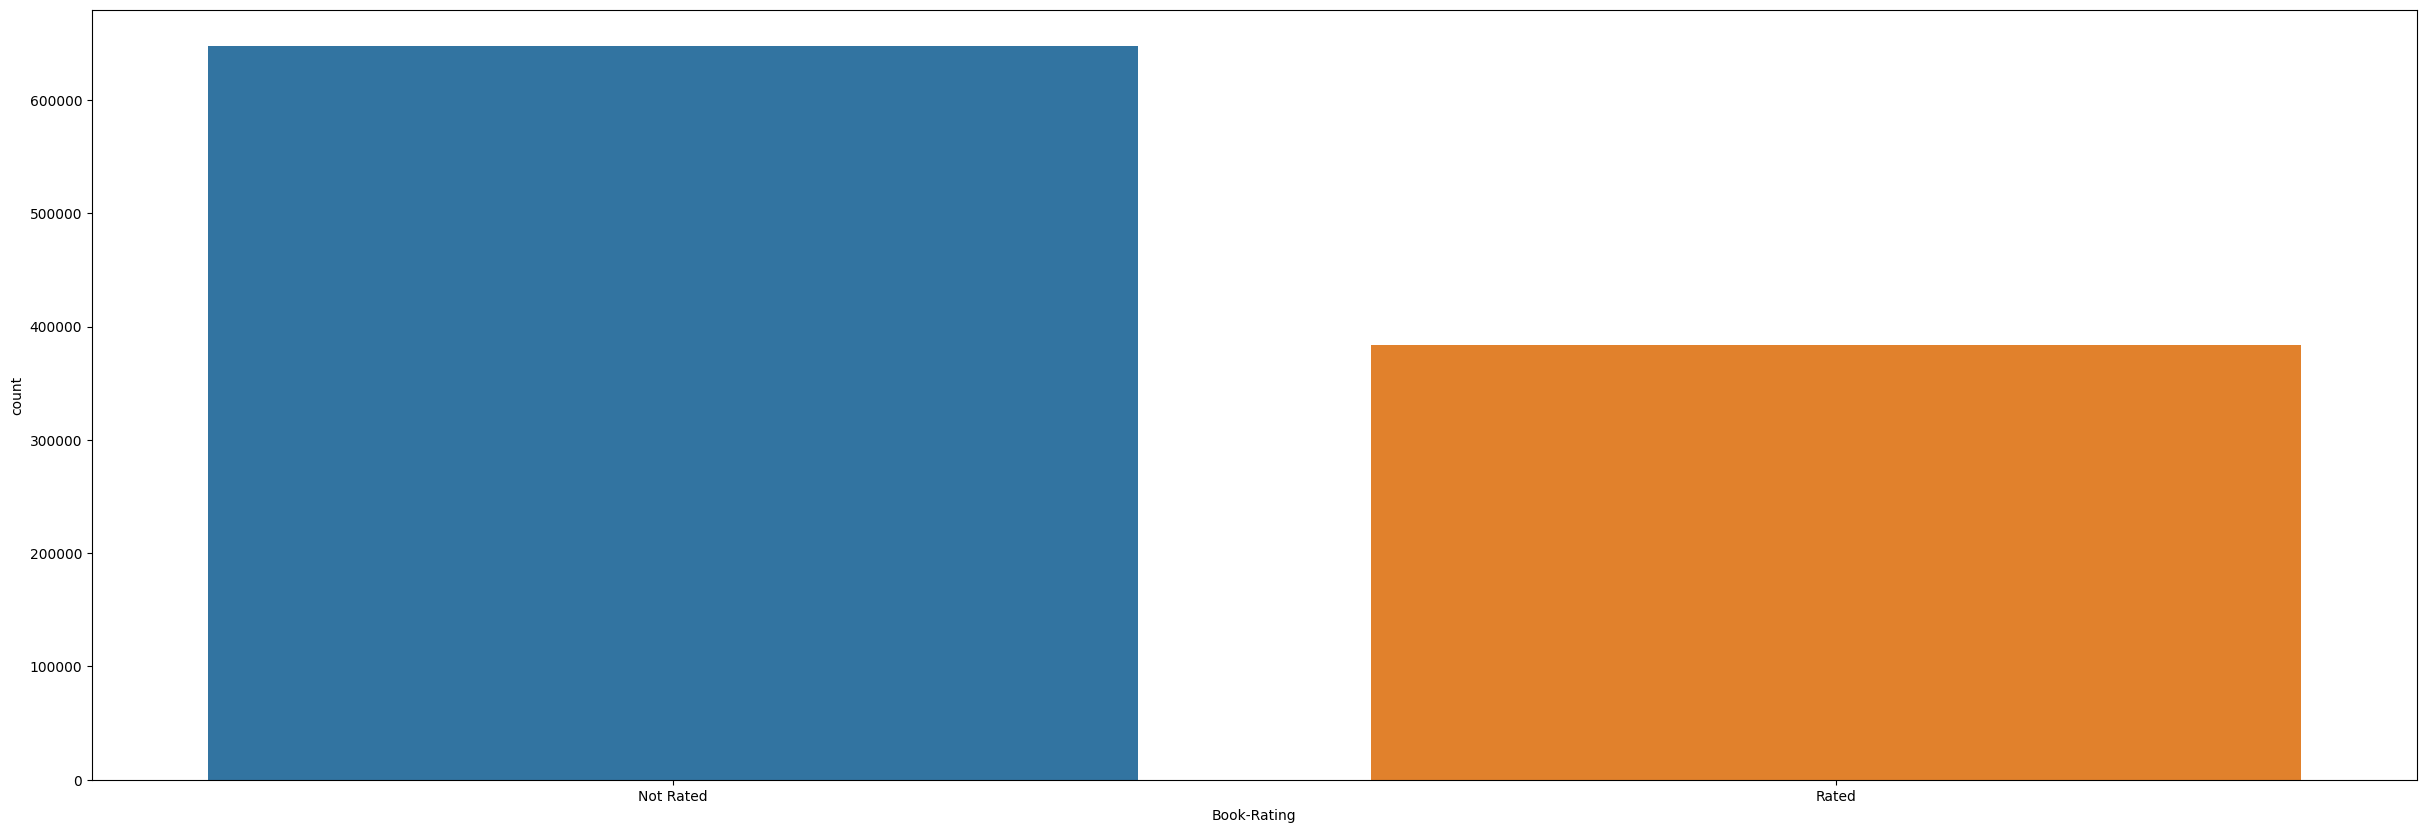

In [57]:
# Chart - 10 visualization code
#Percentage of books not rated
rated_or_not = ratings_original['Book-Rating'].map(lambda x : 'Rated' if x !=0 else 'Not Rated')
sns.countplot(x = rated_or_not)

##### 1. Why did you pick the specific chart?

To know how many books have beenn rated and how many have been not

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

<Axes: xlabel='Number of Rating', ylabel='Book-Title'>

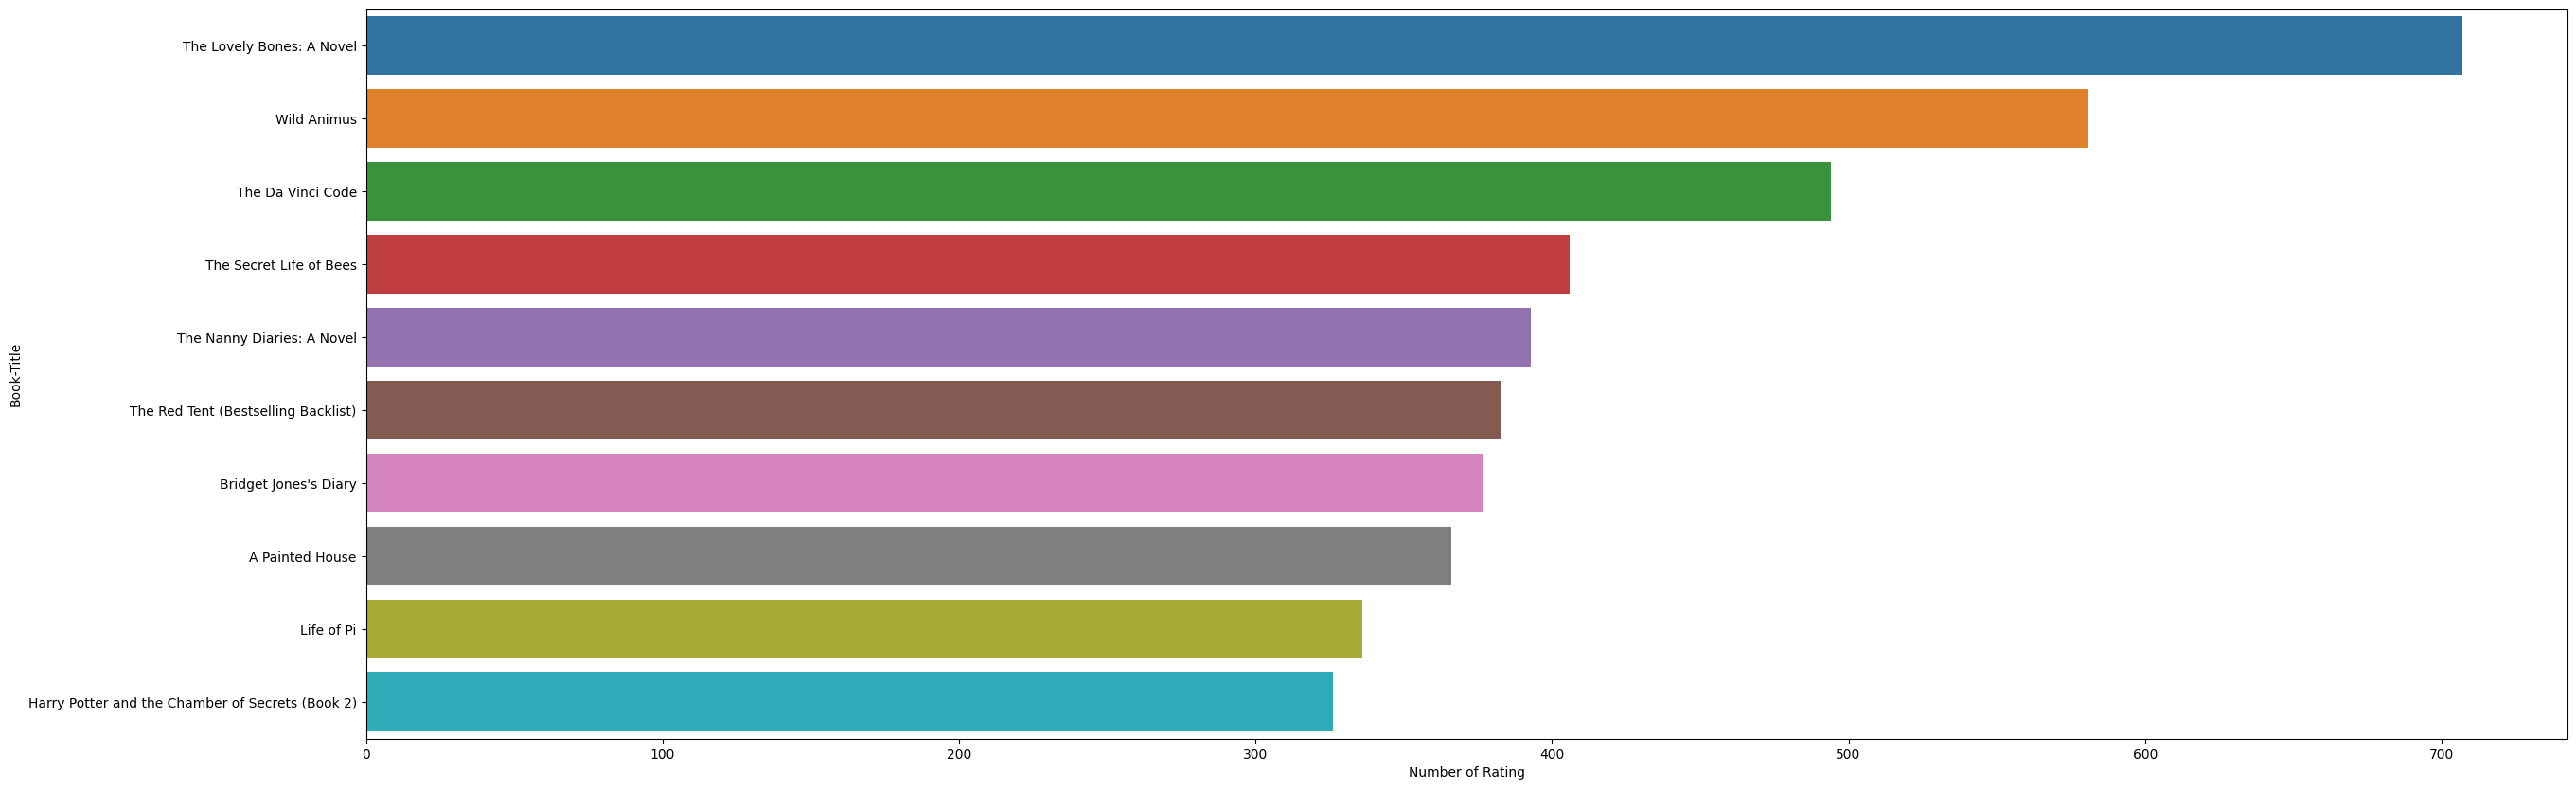

In [58]:
# Chart - 11 visualization code
temp  = average_numbers_of_ratings[average_numbers_of_ratings['Number of Rating'] > 250].sort_values('Number of Rating', ascending = False)[:10]
sns.barplot( x = temp['Number of Rating'],y = temp['Book-Title'])

##### 1. Why did you pick the specific chart?

To see the top ten books with most ratings

##### 2. What is/are the insight(s) found from the chart?

The lovely bones has got the most ratings

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

##### 1. Why did you pick the specific chart?

To see the top ten books with best average ratings.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [59]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [60]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [61]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

Hypothesis testing is a form of statistical inference that uses data from a sample to draw conclusions about a population parameter or a population probability distribution

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

The ratings on books given by users of USA and Canada are Identical

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis : The users of usa and canada has same ditribution of book ratings
* Alternate Hypothesis : The users of usa and canada has not same ditribution of book ratings

#### 2. Perform an appropriate statistical test.

In [62]:
import scipy.stats

In [63]:
sample1 = user_ratings[user_ratings['country'] == ' canada']['Book-Rating']
sample2 = user_ratings[user_ratings['country'] == ' united kingdom']['Book-Rating']

In [64]:
stat, p = scipy.stats.mannwhitneyu(sample1, sample2)

In [65]:
print('stat = %.3f, p=%5f' %(stat, p))

if p > 0.05:
  print('Identical Distribution')
else:
  print('Non-Identical Distribution')

stat = 242513336.500, p=0.000000
Non-Identical Distribution


##### Which statistical test have you done to obtain P-Value?

Mann-Whitney U test has been used to obtain P value

##### Why did you choose the specific statistical test?

To check wheter the Book-Rating given by people of USA and Canada are Identical or not

### Hypothetical Statement - 2

The users age and the book ratings are independent sample

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis :The users age and the book rating are independent
* Alternate Hypothesis : The users age and the book rating are dependent

#### 2. Perform an appropriate statistical test.

In [66]:
# Perform Statistical Test to obtain P-Value
first_sample = Final_Dataset['Age']
second_sample = Final_Dataset['Book-Rating']

from scipy.stats import pearsonr

stat, p = pearsonr(first_sample, second_sample)

print('stat = %.3f, p=%5f' %(stat, p))

if p > 0.05:
  print('Independent sample')
else:
  print('dependent sample')

stat = 0.085, p=0.000000
dependent sample


##### Which statistical test have you done to obtain P-Value?

Pearson Corrlation test has been used

##### Why did you choose the specific statistical test?

To check the independence of the users' age and book rating

### Hypothetical Statement - 3

The age of the users are in normal distribution

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis : Age of the users are in Normal Distribution
* Alternate Hypothesis : Age of the users are not in Normal distribution

#### 2. Perform an appropriate statistical test.

In [67]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import shapiro

data_to_test = users['Age']

stat, p = shapiro(data_to_test)

print('stat=%02f, p=%.30f' %(stat,p))

if p > 0.05:
  print('Normal Distribution')
else:
  print('Not a Normal Distribution')

stat=0.869663, p=0.000000000000000000000000000000
Not a Normal Distribution


##### Which statistical test have you done to obtain P-Value?

* Shapiro-Wilk test has been used to test Normality

##### Why did you choose the specific statistical test?

To test if the data user's age is normally distributed

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [68]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [69]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [70]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [71]:
# Expand Contraction

#### 2. Lower Casing

In [72]:
# Lower Casing

#### 3. Removing Punctuations

In [73]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [74]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [75]:
# Remove Stopwords

In [76]:
# Remove White spaces

#### 6. Rephrase Text

In [77]:
# Rephrase Text

#### 7. Tokenization

In [78]:
# Tokenization

#### 8. Text Normalization

In [79]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [80]:
# POS Taging

#### 10. Text Vectorization

In [81]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [82]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [83]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [84]:
# Transform Your data

### 6. Data Scaling

In [85]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [86]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [87]:
# Split your data to train and test. Choose Splitting ratio wisely.
trainset, testset = train_test_split(data, test_size=0.3)

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [88]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### Collaborative Filtering Recommender System

In [89]:
#Making a pivot table with 'ISBN' as index 'User-ID' as columns and the ratings as the values
pt =  df.pivot_table(index = 'ISBN' , columns = 'User-ID' , values = 'Book-Rating')
#Filling the null values in the pivot table with zero
pt.fillna(0,inplace = True)

In [90]:
from sklearn.metrics.pairwise import cosine_similarity
#Getting the similarity scores on the basis of cosine similarity
similarity_scores = cosine_similarity(pt)
def recommender(book_number):
  if book_number in pt.index :
    #Fetching the index of the book name provided
    index = np.where(pt.index==book_number)[0][0]
#Sorting the similar items on the basis of similarity scores made on basis of  cosine similarity
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]
#Making a DataFrame of the recommended books 
    recommendations = pd.DataFrame()
    for i in similar_items:
        recommendations = recommendations.append(books[books['ISBN'] == pt.index[i[0]]])
    return recommendations
  else :
    print("The book is not a part of recommendation system , Please try another book for getting similar books recommendation\n Till then you can try these most liked books")
    return top_rated_books.head(10)
recommender('0002251760')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,year
26761,0811811409,The Venetian's Wife: A Strangely Sensual Tale ...,Nick Bantock,1996,Chronicle Books,1996
34196,0671458531,Color Purple,Alice Walker,0,Simon Schuster Trade,0
29250,0749918241,Clear Your Clutter and Feng Shui Your Life,Karen Kingston,1998,Judy Piatkus Publishers Ltd,1998
74556,081183140X,Alexandria: In Which the Extraordinary Corresp...,Nick Bantock,2002,Chronicle Books,2002
35138,0679739793,Waterland,GRAHAM SWIFT,1992,Vintage,1992


In [91]:
recommender('0195153448')

The book is not a part of recommendation system , Please try another book for getting similar books recommendation
 Till then you can try these most liked books


,Book-Title,Number of Rating,Average-Ratings
119061,"The Two Towers (The Lord of the Rings, Part 2)",136,9.330882
115128,"The Return of the King (The Lord of the Rings,...",103,9.213592
45381,Harry Potter and the Goblet of Fire (Book 4),247,9.125506
107392,The Hobbit,50,9.120000
109837,The Little Prince,90,9.111111
18993,Charlotte's Web (Trophy Newbery),68,9.073529
45400,Harry Potter and the Sorcerer's Stone (Book 1),176,9.062500
925,84 Charing Cross Road,61,9.049180
45385,Harry Potter and the Order of the Phoenix (Boo...,211,9.047393
45393,Harry Potter and the Prisoner of Azkaban (Book 3),277,9.043321


### Functions

In [124]:
def shuffle_books(book , number_of_books):
  list_of_books = list(book.ISBN)
  random.shuffle(list_of_books)
  recommended_books = pd.DataFrame()
  list_of_books = list_of_books[0:number_of_books]
  for x in list_of_books:
    recommended_books = recommended_books.append(books[books['ISBN'] == x])
  return recommended_books
  
  

In [94]:
#Function to visualize actual and predicted ratings of the used model
def actual_predicted() :
  df_pred = pd.DataFrame(predictions, columns=['User-ID', 'ISBN', 'actual_rating', 'pred_rating', 'details'])
  df_pred['pred_rating_round'] = df_pred['pred_rating'].round()
  fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

  sns.countplot(x='actual_rating', data=df_pred, ax=ax1)
  ax1.set_title('Distribution of actual ratings of books in the test set')

  sns.countplot(x='pred_rating_round', data=df_pred, ax=ax2)
  ax2.set_title('Distribution of predicted ratings of books in the test set')

  plt.show()


In [126]:
def book_recommender(algo , user_id):
#Getting those rows from DataFrame where 'User-ID' is the given id passed in recommender parameter
  ratings_temp = ratings[ratings['User-ID'] == user_id]
#Getting the list of all the rated  books
  unique_ids = ratings['ISBN'].unique()
#Getting the list of books the user has read
  iids = ratings_temp['ISBN']
#Getting the list of books user is yet to read
  books_to_predict = np.setdiff1d(unique_ids,iids)
  my_recs = []
  for iid in books_to_predict:
    my_recs.append((iid, algo.predict(uid=user_id,iid=iid).est))
  predicted_books = pd.DataFrame(my_recs, columns=['iid', 'predictions']).sort_values('predictions', ascending=False).head(25)
  recommended_books = pd.DataFrame()
  for x in predicted_books['iid']:
    recommended_books = recommended_books.append(books[books['ISBN'] == x])
  return shuffle_books(recommended_books , 10)

### ML Model - 1 - KNN

In [98]:
# ML Model - 1 Implementation
model_knn= KNNWithMeans()
cv_results_knn = cross_validate(model_knn, data, cv=3)
print(pd.DataFrame(cv_results_knn).mean())
# Fit the Algorithm
model_knn.fit(trainset)
# Predict on the model
predictions = model_knn.test(testset)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
test_rmse    1.707483
test_mae     1.270134
fit_time     0.084669
test_time    0.410346
dtype: float64
Computing the msd similarity matrix...
Done computing similarity matrix.


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

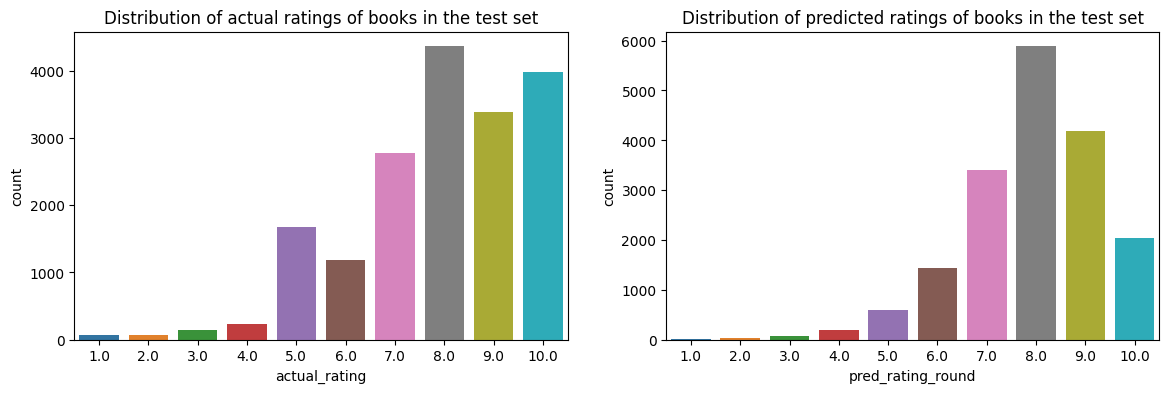

In [99]:
# Visualizing evaluation Metric Score chart
actual_predicted()

#### 2. Cross- Validation & Hyperparameter Tuning

In [100]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

In [101]:
# ML Model - 2 Implementation
model_svd= SVD()
cv_results_svd = cross_validate(model_svd, data, cv=3)
print(pd.DataFrame(cv_results_svd).mean())
# Fit the Algorithm
model_svd.fit(trainset)
# Predict on the model
predictions = model_svd.test(testset)

test_rmse    1.514616
test_mae     1.152055
fit_time     1.111824
test_time    0.240376
dtype: float64


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

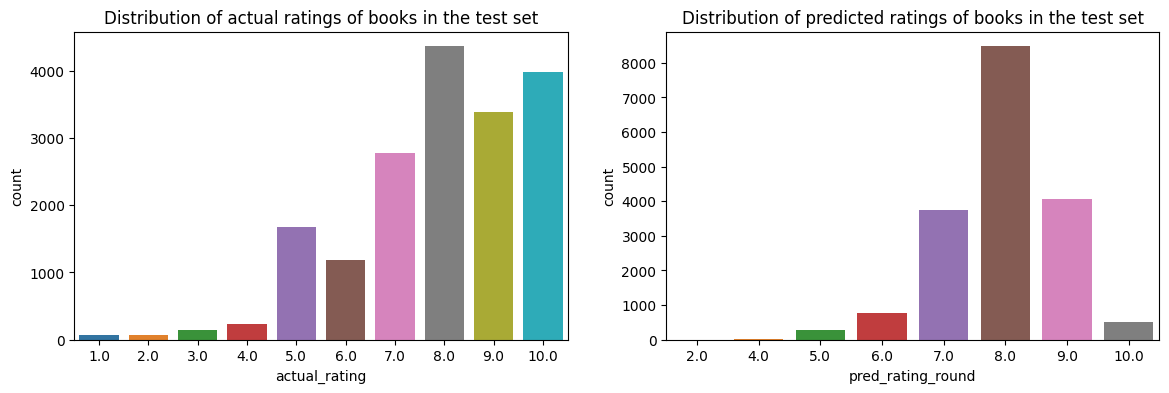

In [102]:
# Visualizing evaluation Metric Score chart
actual_predicted()

#### 2. Cross- Validation & Hyperparameter Tuning

In [103]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {'n_factors': [80,100],
              'n_epochs': [5, 20],
              'lr_all': [0.002, 0.005],
              'reg_all': [0.2, 0.4]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
# Fit the Algorithm
gs.fit(data)
# Predict on the model

In [104]:
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

1.5096233483377144
{'n_factors': 80, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.2}


In [105]:
model = SVD(n_factors=80, n_epochs=20, lr_all=0.005, reg_all=0.2)
model.fit(trainset)
predictions = model.test(testset)

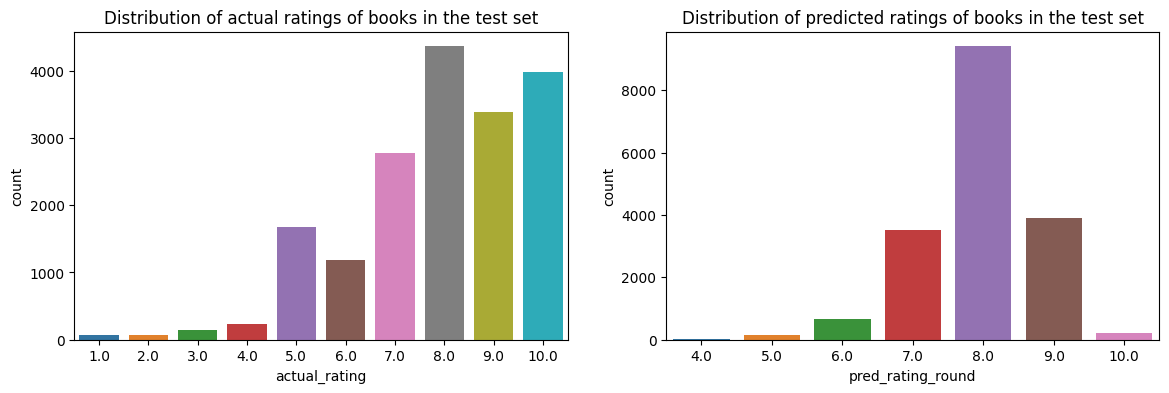

In [106]:
actual_predicted()

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

Answer Here.

### ML Model - 3

In [107]:
# ML Model - 3 Implementation
model_nmf= NMF()
cv_results_nmf = cross_validate(model_nmf, data, cv=3)
print(pd.DataFrame(cv_results_nmf).mean())
# Fit the Algorithm
model_nmf.fit(trainset)
# Predict on the model
predictions = model_nmf.test(testset)

test_rmse    2.675533
test_mae     2.311465
fit_time     2.845240
test_time    0.382134
dtype: float64


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

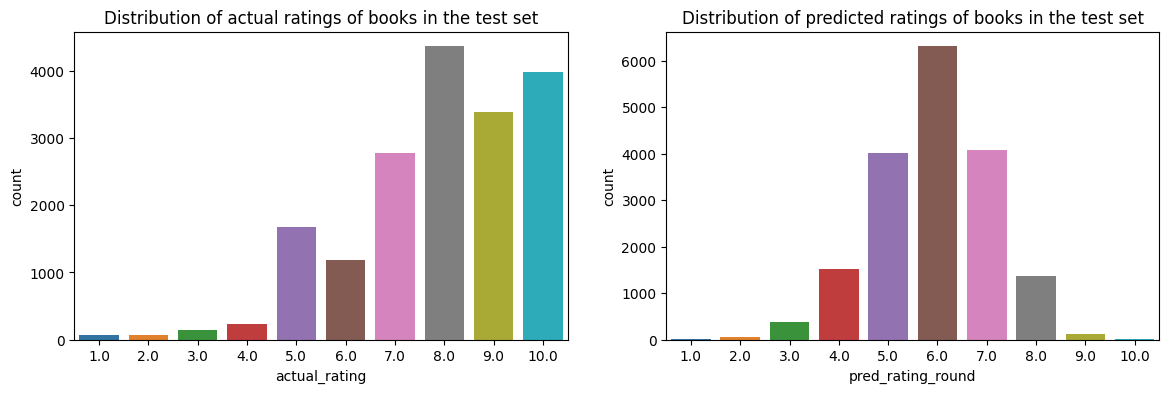

In [108]:
# Visualizing evaluation Metric Score chart
actual_predicted()

#### 2. Cross- Validation & Hyperparameter Tuning

In [109]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Root Mean Squared Error(RMSE) is chosen as the evaluation metric

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The model KNNwithMeans is chosen as the final model as it gives the best rmse score than other models.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

### Recommending  Books

In [109]:
book_recommender(model_knn , 237577)

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [110]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [111]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***